<a href="https://colab.research.google.com/github/rk119/F20BC/blob/main/F20BC_Coursework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Biologically-Inspired Computation (F20BC) Coursework

**Overview:**

The following coursework aims to build an Artificial Neural Network (ANN) with Feedforward and instead of Backpropogation, the neural network is trained using the Particle Swarm Optimisation (PSO) algorithm, two biologically-inspired techniques which are taught in this course. The ANN structure and PSO algorithms are implemented from scratch, to build a deeper understanding as well as investigate or experiment with them flexibly to get a comprehensive idea on how the ANN is optimised using PSO in low level for a specified task.



# Data preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Imports

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

## Variables

In [ ]:
skipHeader = False
normalize = True
test_split = 0.2
input_nodes = 4

### Load the data

In [ ]:
if skipHeader:
    df = pd.read_csv("/content/drive/MyDrive/F20BC-Dataset/data_banknote_authentication.csv", skiprows=1)
else:
    df = pd.read_csv("/content/drive/MyDrive/F20BC-Dataset/data_banknote_authentication.csv", header=None)

### View the first 5 instances of the data

In [ ]:
df.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## Viewing the number of rows and columns

In [ ]:
df.shape

(1372, 5)

## Split the data into features and target

**Note:** For one dataset, the target class is seperated into a different variable since we do not want the model to consider it as an input feature

In [ ]:
def split_input_output(data):
    X = data.iloc[:, :-1].to_numpy()
    Y = data.iloc[:, -1].to_numpy()

    return [X, Y]

In [ ]:
x = split_input_output(df)[0]
y = split_input_output(df)[1]

In [ ]:
x.shape

(1372, 4)

In [ ]:
x

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1])

## Normalize if specified

In [ ]:
def norm(data):
    scaler = MinMaxScaler()
    return scaler.fit_transform(data)

In [ ]:
x_norm = norm(x)
x_norm

array([[0.76900389, 0.83964273, 0.10678269, 0.73662766],
       [0.83565902, 0.82098209, 0.12180412, 0.64432563],
       [0.78662859, 0.41664827, 0.31060805, 0.78695091],
       ...,
       [0.23738543, 0.01176814, 0.98560321, 0.52475518],
       [0.25084193, 0.20170105, 0.76158701, 0.6606745 ],
       [0.32452819, 0.49074676, 0.34334762, 0.88594888]])

In [ ]:
x_norm.shape

(1372, 4)

In [ ]:
len(x_norm)

1372

In [ ]:
len(y)

1372

## Split data into Train and Test

In [ ]:
x_norm, x_test, y, y_test = train_test_split(x_norm, y, test_size=test_split, random_state=42)

# Artificial Neural Network (ANN)

Artificial Neural Networks (ANNs) are computational models inspired by the human brain. They are composed of interconnected units or nodes called artificial neurons, which simulate the way biological neurons signal each other. ANNs are used in machine learning for pattern recognition and data classification, among other tasks.

In an ANN, neurons are organized in layers: an input layer to receive signals, one or more hidden layers to process them, and an output layer to deliver the final result. The network learns by adjusting the weights of connections based on the data it processes, typically through a method called backpropagation combined with a gradient descent optimization algorithm.

## Functions to utilize later

### Activation Functions

In [ ]:
class ActivationFunctions:
  def evaluate(self,x):
    pass
  def derivate(self,x):
    pass

class Identity:
  def evaluate(self,x):
    return x
  def derivative(self,x):
    return 1

class Sigmoid(ActivationFunctions):
  def evaluate(self,x):
    x_clipped = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x_clipped))
  def derivative(self,x):
    f = self.evaluate(x)
    return f * (1-f)

class Tanh(ActivationFunctions):
  def evaluate(self,x):
    return np.tanh(x)
  def derivative(self,x):
    f = self.evaluate(x)
    return 1 - f ** 2

class relu(ActivationFunctions):
  def evaluate(self,x):
    return np.maximum(0, x)
  def derivative(self,x):
    return (x > 0).astype(float)

### Loss Functions

In [ ]:
class LossFunctions:
  def evaluate(self,x):
    pass
  def derivate(self,x):
    pass

# y is predictions made by the neural network
# t is target/actual numbers corresponding to inputs
class Mse(LossFunctions):
  def evaluate(self, y, t):
    return ((t - y) ** 2).mean()
  def derivative(self, y, t):
    return 2 * (y - t) / len(y)

class BinaryCrossEntropy(LossFunctions):
  def evaluate(self, y, t):
    y_pred = np.clip(y, 1e-7, 1 - 1e-7)
    term0 = (1 - t) * np.log(1 - y_pred + 1e-7)
    term1 = t * np.log(y_pred + 1e-7)
    return - (term0 + term1).mean()

  def derivative(self, y, t):
    y_pred = np.clip(y, 1e-7, 1 - 1e-7)
    return (t / y_pred) - (1 - t) / (1 - y_pred)

class Hinge(LossFunctions):
  def evaluate(self, y, t):
    return np.maximum(0, 1 - t * y).mean()

  def derivative(self, y, t):
    return np.where(t * y < 1, -t, 0)

### Neural Network

In [ ]:
class InputLayer:
    def __init__(self, input_size):
        self.nb_nodes = input_size

    def forward(self, input_data):
        return input_data

class Layer:
    def __init__(self, input_size, nodes, activation, weights=None, biases=None):
        self.nb_nodes = nodes
        self.W = weights if weights is not None else np.random.randn(input_size, nodes)
        self.B = biases if biases is not None else np.random.randn(nodes)
        self.activation = activation

    def forward(self, input_data):
        self.X_in = input_data
        z = np.dot(input_data, self.W) + self.B
        out = self.activation.evaluate(z)
        return out

class NeuralNetwork:
    def __init__(self, configuration, position=None):
        self.layers = []
        input_size = configuration[0]

        # The input layer is simply added as a pass-through layer
        self.layers.append(InputLayer(input_size))

        # If a position vector is provided, it contains weights and biases for each layer
        if position is not None:
            for idx, (nodes, activation) in enumerate(configuration[1:]):
                weights, biases = position[idx]
                # print("layer ", idx, "W = ",weights, "B = ", biases )
                layer = Layer(input_size, nodes, activation, weights=weights, biases=biases)
                self.add(layer)
                input_size = nodes  # Update input size for the next layer
        else:
            # If no position vector, initialize layers with random weights and biases
            for nodes, activation in configuration[1:]:
                layer = Layer(input_size, nodes, activation)
                self.add(layer)
                input_size = nodes  # Update input size for the next layer

    def add(self, layer):
        self.layers.append(layer)

    def forward(self, input_data):
        for layer in self.layers:
            input_data = layer.forward(input_data)
        return input_data

    def print_layers(self):
        for i, layer in enumerate(self.layers):
            if isinstance(layer, InputLayer):
                print(f"Layer {i}: Input Layer with {layer.nb_nodes} nodes")
            elif isinstance(layer, Layer):
                print(f"Layer {i}: Hidden Layer with {layer.nb_nodes} nodes, Activation Function: {layer.activation.__class__.__name__}")
                print(f"  Weights Shape: {layer.W.shape}, Biases Shape: {layer.B.shape}")
                print(f"  Weights= : {layer.W}, Biases= {layer.B}")
            else:
                print(f"Layer {i}: Unknown Layer Type")

    def flatten_weights_and_biases(self):
        flattened_vector = []
        for layer in self.layers:
            if isinstance(layer, Layer):
                # Flatten and append weights and biases of this layer
                flattened_weights = layer.W.flatten()
                flattened_biases = layer.B.flatten()
                flattened_vector.extend(flattened_weights.tolist())
                flattened_vector.extend(flattened_biases.tolist())
        return flattened_vector

### Reconstructing Weights and Biases from Flattened Vector

In [ ]:
def unflatten_weights_and_biases(flattened_vector, configuration):
    position = []
    index = 0

    # Skip the input layer configuration, as it doesn't have weights or biases
    for nodes, _ in configuration[1:]:
        # Previous layer's node count is the number of rows for weights
        input_size = configuration[0] if not position else position[-1][0].shape[1]

        # Calculate the number of weights and biases
        num_weights = input_size * nodes
        num_biases = nodes

        # Extract weights and biases from the flattened vector
        weights = flattened_vector[index : index + num_weights]
        biases = flattened_vector[index + num_weights : index + num_weights + num_biases]

        # Reshape weights to the correct dimensions and add to position
        position.append((np.array(weights).reshape(input_size, nodes), np.array(biases)))

        # Update the index
        index += num_weights + num_biases

    return position

In [ ]:
# Creating objects

relu_activation = relu()
sigmoid_activation = Sigmoid()
tanh_activation = Tanh()

In [ ]:
# Configuring the layers with number of nodes, activation and the total number of elements here are the number of layers
configuration = [
    x_norm.shape[1],
    [3, relu_activation],
    [4, relu_activation],
    [1, sigmoid_activation]
]

loss_function = BinaryCrossEntropy()

### Fitness Function

In [ ]:
def fitness(X, Y, W):
    # Rebuild the neural network with the given weights
    position = unflatten_weights_and_biases(W, configuration)
    # print(position)
    neural_network = NeuralNetwork(configuration, position=position)

    # Perform forward pass
    predictions = neural_network.forward(X)

    # Calculate loss
    loss = loss_function.evaluate(predictions.flatten(), Y)
    return loss

### Function to Calculate Accuracy

In [ ]:
def get_accuracy(Y, Y_pred):
    """
    Calcualtes accuracy.
    :param Y: int(N, )
        Correct labels.
    :param Y_pred: int(N, ) | double(N, C)
        Predicted labels of shape(N, ) or (N, C) in case of one-hot vector.
    :return: double
        Accuracy.
    """
    predicted_classes = (Y_pred >= 0.5).astype(int) # Convert probabilities to class labels
    return (Y == predicted_classes).mean()

## Attempting the functions

In [ ]:
nn = NeuralNetwork(configuration)

In [ ]:
nn.print_layers()

Layer 0: Input Layer with 4 nodes
Layer 1: Hidden Layer with 3 nodes, Activation Function: relu
  Weights Shape: (4, 3), Biases Shape: (3,)
  Weights= : [[ 1.1301293  -1.97545545 -0.02691447]
 [ 0.19410106  0.13282557 -0.42301291]
 [ 1.27795215 -1.56041229 -2.06945538]
 [-0.5595845   0.33544935  0.54465029]], Biases= [0.64734701 0.9584159  1.25463   ]
Layer 2: Hidden Layer with 4 nodes, Activation Function: relu
  Weights Shape: (3, 4), Biases Shape: (4,)
  Weights= : [[-0.94200426 -1.04157109 -1.53062947  0.84598513]
 [-0.67500584  0.15601773  0.63256895  0.02962299]
 [-2.06859649 -0.68539739  0.89980953  0.62085875]], Biases= [ 1.57415319 -0.5492156   1.00368003 -0.24174582]
Layer 3: Hidden Layer with 1 nodes, Activation Function: Sigmoid
  Weights Shape: (4, 1), Biases Shape: (1,)
  Weights= : [[-0.58132126]
 [ 0.66402803]
 [-0.81661755]
 [ 0.05736805]], Biases= [-0.83959991]


In [ ]:
flattened_vector = nn.flatten_weights_and_biases()
print(flattened_vector)

[1.130129297495017, -1.9754554455800695, -0.02691447431219012, 0.1941010584469044, 0.132825571107006, -0.4230129108652998, 1.2779521535338556, -1.5604122908841311, -2.069455379496961, -0.5595845011374354, 0.33544934883691496, 0.5446502924239798, 0.6473470104427345, 0.9584158963881246, 1.2546299999090356, -0.9420042604964283, -1.0415710911303782, -1.5306294657868524, 0.845985133577302, -0.6750058382607729, 0.15601772982951617, 0.6325689525799277, 0.02962299008638086, -2.0685964854084804, -0.6853973862561047, 0.8998095308361068, 0.6208587520013158, 1.5741531895544196, -0.5492155951342538, 1.0036800340756515, -0.2417458173122484, -0.5813212562618647, 0.6640280347440293, -0.816617552513038, 0.05736804829868501, -0.839599910248254]


In [ ]:
input_data = x_norm

nn_init_pred = nn.forward(input_data)

In [ ]:
len(nn_init_pred)

1097

# Particle Swarm Optimization (PSO)

It is a computational method that optimizes a problem by iteratively trying to improve a candidate solution with regard to a given measure of quality. It solves a problem by having a population of candidate solutions, known as particles, and moving these particles around in the search-space according to simple mathematical formulae over the particle's position and velocity. Each particle's movement is influenced by its local best known position but is also guided toward the best known positions in the search-space, which are updated as better positions are found by other particles. This is expected to move the swarm toward the best solutions. PSO is widely used in optimization problems where the solution space is vast and multidimensional.

The Particle class represents a single solution in the optimization process. Each particle has its own position and velocity in the solution space.

In [ ]:
class Particle:
    """
    Particle is a neural network representing a potential solution.
    """
    def __init__(self, num_dim, x_range, v_range, r1_range, r2_range, r3_range):
        """
        Particle class constructor
        :param num_dim: Number of dimensions.
        :param x_range: Range of dimension.
        :param v_range: Range of velocity.
        """

        self.x = np.random.uniform(x_range[0], x_range[1], (num_dim, )) # particle position
        self.v = np.random.uniform(v_range[0], v_range[1], (num_dim, )) # particle velocity
        self.pbest = np.inf                                             # personal best fitness
        self.pbestpos = np.zeros((num_dim, ))                           # personal best position
        self.informants_best_position = np.zeros((num_dim, ))           # informants best position
        self.informants = []                                            # particle's informants
        self.r1_range = r1_range                                        # array with min and max range for r1
        self.r2_range = r2_range                                        # array with min and max range for r2
        self.r3_range = r3_range                                        # array with min and max range for r3

    def update_informant_best(self, swarm):
        best_fitness = np.inf
        for informant in self.informants:
            if swarm[informant].pbest < best_fitness:
                best_fitness = swarm[informant].pbest
                self.informants_best_position = swarm[informant].pbestpos.copy()

    def update_velocity(self, global_best_position, alpha, beta, gamma, delta, r1_range, r2_range, r3_range):
        r1 = np.random.uniform(self.r1_range[0], self.r1_range[1])
        r2 = np.random.uniform(self.r2_range[0], self.r3_range[1])
        r3 = np.random.uniform(self.r3_range[0], self.r3_range[1])
        # r1, r2, r3 = np.random.rand(3)  # Random coefficients for stochastic components
        cognitive_component = beta * r1 * (self.pbestpos - self.x)
        social_component = gamma * r2 * (self.informants_best_position - self.x)
        global_component = delta * r3 * (global_best_position - self.x)
        self.v = alpha * self.v + cognitive_component + social_component + global_component

This class represents a group of particles, working together to explore and optimize a problem space. It initializes with a set number of particles, each having its dimensions, velocities, and inertia weights. Particles communicate amongst each other through informants, allowing them to learn from each other's experiences. The optimize method iteratively updates each particle's position and velocity based on personal and collective experiences, steering the swarm towards the best solution.

In [ ]:
class Swarm:
    """
    The Swarm class is a collection of potential solutions, each represented by a particle.
    """
    def __init__(self, no_particle, num_dim, x_range, v_range, iw_range, c, num_informants, r1_range, r2_range, r3_range):
        """
        Swarm class constructor.
        :param no_particle:  Number of particles
        :param num_dim: Number of dimensions.
        :param x_range: Range of dimensions.
        :param v_range: Range of velocities.
        :param iw_range: Range of interia weights.
        :param c: c[0] -> cognitive parameter, c[1] -> social parameter, c[2] -> Global weight, c[3] -> Inertia weight
        :param num_informants: Number of informants
        """
        self.p = np.array([Particle(num_dim, x_range, v_range, r1_range, r2_range, r3_range) for i in range(no_particle)])
        self.gbest = np.inf
        self.gbestpos = np.zeros((num_dim, ))
        self.x_range = x_range
        self.v_range = v_range
        self.iw_range = iw_range
        self.c0 = c[0]            # Cognitive weight
        self.c1 = c[1]            # Social weight
        self.c2 = c[2]            # Global weight
        self.c3 = c[3]            # Inertia weight
        self.num_dim = num_dim    # Number of dimensions, in this case the total number of weights & biases
        self.num_informants = num_informants
        self.assign_informants()
        self.r1_range = r1_range
        self.r2_range = r2_range
        self.r3_range = r3_range

    def print_informants(self):
        """
        Function prints the informants of every particle.
        """
        for i, particle in enumerate(self.p):
            # Print the particle's index and its informants
            print(f"Particle {i} informants: {particle.informants}")

    def assign_informants(self):
        """
        Function assigns informants to every particle
        """
        for i, particle in enumerate(self.p):
            informants = set()
            # add informants until they are num_informants in informants set
            while len(informants) < self.num_informants:
                # Randomly select a potential informant
                possible_informant = np.random.randint(0, len(self.p))
                # if selected informant is not the particle itself, add it to set
                if possible_informant != i:
                    informants.add(possible_informant)
            particle.informants = np.array(list(informants))

    def optimize(self, function, X, Y,  print_step,  iter):
        """
        Function used to start optimization.
        :param function: function
            Function to be optimized
        :param X: input data
            Used in forward pass.
        :param Y: target class
            Used to calculate loss.
        :param print_step: int
            Step for printing
        :param iter: int
            Number of iterations.
        """
        for i in range(iter):
            for particle in self.p:
                # print("particle.x",particle.x)
                fitness = function(X, Y, particle.x)
                # print("fitness",fitness)
                # print("particle.pbest",particle.pbest)

                if fitness < particle.pbest:
                    particle.pbest = fitness
                    particle.pbestpos = particle.x.copy()

                if fitness < self.gbest:
                    self.gbest = fitness
                    self.gbestpos = particle.x.copy()

            for particle in self.p:
                # update informants best
                particle.update_informant_best(self.p)
                # update particle velocity
                particle.update_velocity(self.gbestpos, self.c3, self.c0, self.c1, self.c2, self.r1_range, self.r2_range, self.r3_range)
                # update particle position
                particle.x = particle.x +  particle.v

            # if i % print_step == 0:
                # print('iteration#: ', i+1,  ' loss: ', fitness)

        #print("global best loss: ", self.gbest)

    def best_solution(self):
        '''
        return: array of parameters/weights.
        '''
        return self.gbestpos

In [ ]:
def num_dim(configuration):
  total_weights = 0
  total_biases = 0

  # The number of nodes in the previous layer, initially the input layer
  prev_nodes = configuration[0]

  # Loop through each layer (excluding the input layer)
  for layer in configuration[1:]:
      # Extract the number of nodes in the current layer
      nodes = layer[0]

      # Calculate weights and biases for the current layer
      weights = prev_nodes * nodes
      biases = nodes

      # Add to total weights and biases
      total_weights += weights
      total_biases += biases

      # Update prev_nodes for the next iteration
      prev_nodes = nodes

  # Output the total number of dimensions
  total_dimensions = total_weights + total_biases
  return total_dimensions

### Running the ANN model with manual parameters

In [ ]:
# def ann(config, X_train,  Y_train, no_solution,  w_range, lr_range, iw_range, c , num_informants, loss_function, iterations, r1_range, r2_range, r3_range):
def ann(params):
    # Unpack all parameters
    (
        config, X_train, Y_train, no_solution, w_range, lr_range,
        iw_range, c, num_informants, loss_function, iterations,
        r1_range, r2_range, r3_range
    ) = params

    # c[0] -> cognitive factor, c[1] -> global factor,  c[2] -> social factor, c[3] -> inertial weight
    no_dim = num_dim(config)

    s = Swarm(no_solution, no_dim, w_range, lr_range, iw_range, c, num_informants, r1_range, r2_range, r3_range)
    # s.print_informants()

    # Drop column/s if user picks number of input nodes < number of features
    # Pick number of input nodes between 1 and num of features
    num_features = X_train.shape[1]  # number of features
    number_of_input_nodes = config[0]

    if (number_of_input_nodes < num_features):
      X_train = X_train.iloc[:, :number_of_input_nodes]

    # print(X_train)

    # Train:Test Split
    test_size = 0.2  # User defined split ratio
    X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=test_size, random_state=42)

    s.optimize(fitness, X_train, Y_train, no_solution, iterations)
    W = s.best_solution()
    global_best_loss = s.gbest

    # Perform forward pass with the best solution (weights)
    best_position = unflatten_weights_and_biases(W, config)
    best_nn = NeuralNetwork(config, position=best_position)

    Y_pred = best_nn.forward(X_train).flatten()
    Y_pred2 = best_nn.forward(X_test).flatten()

    # Calculate and print accuracy
    train_accuracy = get_accuracy(Y_train.flatten(), Y_pred)
    # # Calculate and print accuracy
    test_accuracy = get_accuracy(Y_test.flatten(), Y_pred2)

    return train_accuracy, test_accuracy, global_best_loss

# Experimenting

In [ ]:
def calculate_mean_scores(params, num_runs=10):
    train_accuracies = []
    test_accuracies = []
    global_best_losses = []

    # Run the ANN multiple times and record the accuracy and loss
    for _ in range(num_runs):
        train_accuracy, test_accuracy, global_best_loss = ann(params)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
        global_best_losses.append(global_best_loss)

    # Calculate the mean accuracy and loss over all runs
    mean_train_accuracy = np.mean(train_accuracies)
    mean_test_accuracy = np.mean(test_accuracies)
    mean_global_best_loss = np.mean(global_best_losses)

    return mean_train_accuracy, mean_test_accuracy, mean_global_best_loss

In [ ]:
configuration = [4, [5, sigmoid_activation],[1, sigmoid_activation]]

### Experimenting with & Optimizing Num of Particles

In [ ]:
params_num_particles = [
    [configuration, x_norm, y, 20, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.5, 0.3, 0.2, 0.9), 4, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]],
    [configuration, x_norm, y, 25, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.5, 0.3, 0.2, 0.9), 4, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]],
    [configuration, x_norm, y, 30, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.5, 0.3, 0.2, 0.9), 4, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]],
    [configuration, x_norm, y, 35, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.5, 0.3, 0.2, 0.9), 4, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]],
    [configuration, x_norm, y, 40, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.5, 0.3, 0.2, 0.9), 4, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]]
]

for i, params in enumerate(params_num_particles):
    mean_train_accuracy, mean_test_accuracy, mean_global_best_loss = calculate_mean_scores(params)
    print(f"Parameter Set {i}: Mean Global Best Loss: {mean_global_best_loss:.4f}, "
          f"Mean Train Accuracy: {mean_train_accuracy:.3f}, Mean Test Accuracy: {mean_test_accuracy:.3f}")

Parameter Set 0: Mean Global Best Loss: 0.3441, Mean Train Accuracy: 0.846, Mean Test Accuracy: 0.828
Parameter Set 1: Mean Global Best Loss: 0.1523, Mean Train Accuracy: 0.943, Mean Test Accuracy: 0.929
Parameter Set 2: Mean Global Best Loss: 0.1142, Mean Train Accuracy: 0.955, Mean Test Accuracy: 0.943
Parameter Set 3: Mean Global Best Loss: 0.0542, Mean Train Accuracy: 0.980, Mean Test Accuracy: 0.977
Parameter Set 4: Mean Global Best Loss: 0.0685, Mean Train Accuracy: 0.975, Mean Test Accuracy: 0.966


### Experimenting with & Optimizing number of informants

In [ ]:
params_num_informants = [
    [configuration, x_norm, y, 35, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.5, 0.3, 0.2, 0.9), 6, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]],
    [configuration, x_norm, y, 35, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.5, 0.3, 0.2, 0.9), 8, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]],
    [configuration, x_norm, y, 35, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.5, 0.3, 0.2, 0.9), 10, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]],
    [configuration, x_norm, y, 35, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.5, 0.3, 0.2, 0.9), 13, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]],
    [configuration, x_norm, y, 35, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.5, 0.3, 0.2, 0.9), 17, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]],
    [configuration, x_norm, y, 35, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.5, 0.3, 0.2, 0.9), 20, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]]
]

for i, params in enumerate(params_num_informants):
    mean_train_accuracy, mean_test_accuracy, mean_global_best_loss = calculate_mean_scores(params)
    print(f"Parameter Set {i}: Mean Global Best Loss: {mean_global_best_loss:.4f}, "
          f"Mean Train Accuracy: {mean_train_accuracy:.3f}, Mean Test Accuracy: {mean_test_accuracy:.3f}")

Parameter Set 0: Mean Global Best Loss: 0.0794, Mean Train Accuracy: 0.972, Mean Test Accuracy: 0.966
Parameter Set 1: Mean Global Best Loss: 0.1124, Mean Train Accuracy: 0.957, Mean Test Accuracy: 0.945
Parameter Set 2: Mean Global Best Loss: 0.1752, Mean Train Accuracy: 0.935, Mean Test Accuracy: 0.926
Parameter Set 3: Mean Global Best Loss: 0.2390, Mean Train Accuracy: 0.914, Mean Test Accuracy: 0.892
Parameter Set 4: Mean Global Best Loss: 0.1935, Mean Train Accuracy: 0.926, Mean Test Accuracy: 0.911
Parameter Set 5: Mean Global Best Loss: 0.2906, Mean Train Accuracy: 0.874, Mean Test Accuracy: 0.862


### Experimenting with & Optimizing number of Particles & Informants

In [ ]:
params_num_particles_informants = [
    [configuration, x_norm, y, 40, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.5, 0.3, 0.2, 0.9), 6, BinaryCrossEntropy(), 100, [0,1], [0,1], [0,1]],
    [configuration, x_norm, y, 40, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.5, 0.3, 0.2, 0.9), 10, BinaryCrossEntropy(), 100, [0,1], [0,1], [0,1]],
    [configuration, x_norm, y, 35, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.5, 0.3, 0.2, 0.9), 4, BinaryCrossEntropy(), 100, [0,1], [0,1], [0,1]],
    [configuration, x_norm, y, 25, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.5, 0.3, 0.2, 0.9), 3, BinaryCrossEntropy(), 100, [0,1], [0,1], [0,1]],
    [configuration, x_norm, y, 20, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.5, 0.3, 0.2, 0.9), 3, BinaryCrossEntropy(), 100, [0,1], [0,1], [0,1]]
]

for i, params in enumerate(params_num_particles_informants):
    mean_train_accuracy, mean_test_accuracy, mean_global_best_loss = calculate_mean_scores(params)
    print(f"Parameter Set {i}: Mean Global Best Loss: {mean_global_best_loss:.4f}, "
          f"Mean Train Accuracy: {mean_train_accuracy:.3f}, Mean Test Accuracy: {mean_test_accuracy:.3f}")

Parameter Set 0: Mean Global Best Loss: 0.3305, Mean Train Accuracy: 0.844, Mean Test Accuracy: 0.840
Parameter Set 1: Mean Global Best Loss: 0.2773, Mean Train Accuracy: 0.880, Mean Test Accuracy: 0.867
Parameter Set 2: Mean Global Best Loss: 0.2693, Mean Train Accuracy: 0.870, Mean Test Accuracy: 0.855
Parameter Set 3: Mean Global Best Loss: 0.4571, Mean Train Accuracy: 0.764, Mean Test Accuracy: 0.751
Parameter Set 4: Mean Global Best Loss: 0.4315, Mean Train Accuracy: 0.773, Mean Test Accuracy: 0.748


### Increase the number of Particles and increase & decrease global weight

In [ ]:
params_num_particles_glob = [
    [configuration, x_norm, y, 40, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.5, 0.3, 0.3, 0.2), 4, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]],
    [configuration, x_norm, y, 40, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.5, 0.3, 0.3, 0.5), 4, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]],
    [configuration, x_norm, y, 40, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.5, 0.3, 0.3, 1.2), 4, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]],
    [configuration, x_norm, y, 40, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.5, 0.3, 0.3, 2), 4, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]],
    [configuration, x_norm, y, 40, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.5, 0.3, 0.3, 3), 4, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]]
]

for i, params in enumerate(params_num_particles_glob):
    mean_train_accuracy, mean_test_accuracy, mean_global_best_loss = calculate_mean_scores(params)
    print(f"Parameter Set {i}: Mean Global Best Loss: {mean_global_best_loss:.4f}, "
          f"Mean Train Accuracy: {mean_train_accuracy:.3f}, Mean Test Accuracy: {mean_test_accuracy:.3f}")

Parameter Set 0: Mean Global Best Loss: 0.9202, Mean Train Accuracy: 0.445, Mean Test Accuracy: 0.423
Parameter Set 1: Mean Global Best Loss: 0.6833, Mean Train Accuracy: 0.555, Mean Test Accuracy: 0.577
Parameter Set 2: Mean Global Best Loss: 0.4971, Mean Train Accuracy: 0.778, Mean Test Accuracy: 0.765
Parameter Set 3: Mean Global Best Loss: 0.6222, Mean Train Accuracy: 0.680, Mean Test Accuracy: 0.691
Parameter Set 4: Mean Global Best Loss: 0.8853, Mean Train Accuracy: 0.445, Mean Test Accuracy: 0.423


### Increase number of particles and informants, then give the social weight more priority.

In [ ]:
params_num_particles_more_social = [
    [configuration, x_norm, y, 40, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.5, 0.3, 1.0, 0.3), 6, BinaryCrossEntropy(), 120, [0,1], [0,1], [0,1]],
    [configuration, x_norm, y, 40, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.5, 0.4, 0.8, 0.2), 9, BinaryCrossEntropy(), 120, [0,1], [0,1], [0,1]],
    [configuration, x_norm, y, 40, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.5, 0.2, 0.8, 0.4), 12, BinaryCrossEntropy(), 120, [0,1], [0,1], [0,1]],
    [configuration, x_norm, y, 40, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.5, 0.5, 0.5, 0.5), 16, BinaryCrossEntropy(), 120, [0,1], [0,1], [0,1]],
    [configuration, x_norm, y, 40, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.5, 0.5, 0.3, 0.5), 20, BinaryCrossEntropy(), 120, [0,1], [0,1], [0,1]]
]

for i, params in enumerate(params_num_particles_more_social):
    mean_train_accuracy, mean_test_accuracy, mean_global_best_loss = calculate_mean_scores(params)
    print(f"Parameter Set {i}: Mean Global Best Loss: {mean_global_best_loss:.4f}, "
          f"Mean Train Accuracy: {mean_train_accuracy:.3f}, Mean Test Accuracy: {mean_test_accuracy:.3f}")

Parameter Set 0: Mean Global Best Loss: 0.6853, Mean Train Accuracy: 0.555, Mean Test Accuracy: 0.577
Parameter Set 1: Mean Global Best Loss: 0.7379, Mean Train Accuracy: 0.482, Mean Test Accuracy: 0.477
Parameter Set 2: Mean Global Best Loss: 0.6788, Mean Train Accuracy: 0.555, Mean Test Accuracy: 0.577
Parameter Set 3: Mean Global Best Loss: 0.6761, Mean Train Accuracy: 0.556, Mean Test Accuracy: 0.577
Parameter Set 4: Mean Global Best Loss: 0.6774, Mean Train Accuracy: 0.556, Mean Test Accuracy: 0.577


In [ ]:
params_num_particles_more_social2 = [
    [configuration, x_norm, y, 40, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.5, 0.3, 1.0, 0.3), 6, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]],
    [configuration, x_norm, y, 40, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.5, 0.4, 0.8, 0.2), 9, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]],
    [configuration, x_norm, y, 40, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.5, 0.2, 0.8, 0.4), 12, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]],
    [configuration, x_norm, y, 40, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.5, 0.5, 0.5, 0.5), 16, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]],
    [configuration, x_norm, y, 40, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.5, 0.5, 0.3, 0.5), 20, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]]
]

for i, params in enumerate(params_num_particles_more_social2):
    mean_train_accuracy, mean_test_accuracy, mean_global_best_loss = calculate_mean_scores(params)
    print(f"Parameter Set {i}: Mean Global Best Loss: {mean_global_best_loss:.4f}, "
          f"Mean Train Accuracy: {mean_train_accuracy:.3f}, Mean Test Accuracy: {mean_test_accuracy:.3f}")

Parameter Set 0: Mean Global Best Loss: 0.6811, Mean Train Accuracy: 0.555, Mean Test Accuracy: 0.577
Parameter Set 1: Mean Global Best Loss: 0.7277, Mean Train Accuracy: 0.478, Mean Test Accuracy: 0.469
Parameter Set 2: Mean Global Best Loss: 0.6823, Mean Train Accuracy: 0.555, Mean Test Accuracy: 0.577
Parameter Set 3: Mean Global Best Loss: 0.6702, Mean Train Accuracy: 0.580, Mean Test Accuracy: 0.605
Parameter Set 4: Mean Global Best Loss: 0.6801, Mean Train Accuracy: 0.555, Mean Test Accuracy: 0.577


### Test: Train Split Ratio

In [ ]:
params_num_particles_split = [
    [configuration, x_norm, y, 35, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.5, 0.3, 0.2, 0.9), 4, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]],
]

for i, params in enumerate(params_num_particles_split):
    mean_train_accuracy, mean_test_accuracy, mean_global_best_loss = calculate_mean_scores(params)
    print(f"Parameter Set {i}: Mean Global Best Loss: {mean_global_best_loss:.4f}, "
          f"Mean Train Accuracy: {mean_train_accuracy:.3f}, Mean Test Accuracy: {mean_test_accuracy:.3f}")

Parameter Set 0: Mean Global Best Loss: 0.1200, Mean Train Accuracy: 0.954, Mean Test Accuracy: 0.944


### Changing delta

In [ ]:
params_num_delta = [
        [configuration, x_norm, y, 35, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.2, 0.5, 0.7, 0.5), 4, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]],
        [configuration, x_norm, y, 35, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.2, 0.5, 1.0, 0.5), 4, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]],
        [configuration, x_norm, y, 35, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.2, 0.5, 1.2, 0.5), 4, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]],
        [configuration, x_norm, y, 35, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.2, 0.5, 0.5, 0.5), 4, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]],
        [configuration, x_norm, y, 35, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.2, 0.5, 1.5, 0.5), 4, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]]
]

for i, params in enumerate(params_num_delta):
    mean_train_accuracy, mean_test_accuracy, mean_global_best_loss = calculate_mean_scores(params)
    print(f"Parameter Set {i}: Mean Global Best Loss: {mean_global_best_loss:.4f}, "
          f"Mean Train Accuracy: {mean_train_accuracy:.3f}, Mean Test Accuracy: {mean_test_accuracy:.3f}")

Parameter Set 0: Mean Global Best Loss: 0.6677, Mean Train Accuracy: 0.567, Mean Test Accuracy: 0.560
Parameter Set 1: Mean Global Best Loss: 0.6026, Mean Train Accuracy: 0.631, Mean Test Accuracy: 0.628
Parameter Set 2: Mean Global Best Loss: 0.5716, Mean Train Accuracy: 0.686, Mean Test Accuracy: 0.678
Parameter Set 3: Mean Global Best Loss: 0.6648, Mean Train Accuracy: 0.570, Mean Test Accuracy: 0.565
Parameter Set 4: Mean Global Best Loss: 0.4227, Mean Train Accuracy: 0.804, Mean Test Accuracy: 0.795


In [ ]:
params_num_delta = [
        [configuration, x_norm, y, 35, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.2, 0.5, 2.0, 0.5), 4, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]],
        [configuration, x_norm, y, 35, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.2, 0.5, 2.5, 0.5), 4, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]]
]

for i, params in enumerate(params_num_delta):
    mean_train_accuracy, mean_test_accuracy, mean_global_best_loss = calculate_mean_scores(params)
    print(f"Parameter Set {i}: Mean Global Best Loss: {mean_global_best_loss:.4f}, "
          f"Mean Train Accuracy: {mean_train_accuracy:.3f}, Mean Test Accuracy: {mean_test_accuracy:.3f}")

Parameter Set 0: Mean Global Best Loss: 0.2864, Mean Train Accuracy: 0.893, Mean Test Accuracy: 0.875
Parameter Set 1: Mean Global Best Loss: 0.2249, Mean Train Accuracy: 0.909, Mean Test Accuracy: 0.897


In [ ]:
params_num_particles = [
    [configuration, x_norm, y, 35, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.2, 0.5, 0.7, 0.5), 4, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]],
    [configuration, x_norm, y, 35, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.4, 0.5, 0.7, 0.5), 4, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]],
    [configuration, x_norm, y, 35, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.6, 0.5, 0.7, 0.5), 4, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]],
    [configuration, x_norm, y, 35, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.8, 0.5, 0.7, 0.5), 4, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]],
    [configuration, x_norm, y, 35, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (1.0, 0.5, 0.7, 0.5), 4, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]],
    [configuration, x_norm, y, 35, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.3, 0.5, 0.5, 0.5), 4, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]],
    [configuration, x_norm, y, 35, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.3, 0.5, 0.5, 0.5), 4, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]],
    [configuration, x_norm, y, 35, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.3, 0.5, 0.5, 0.5), 4, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]],
    [configuration, x_norm, y, 35, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.3, 0.5, 0.5, 0.5), 4, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]],
    [configuration, x_norm, y, 35, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.3, 0.5, 0.5, 0.5), 4, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]],
    [configuration, x_norm, y, 35, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.3, 0.5, 0.5, 0.5), 4, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]],
    [configuration, x_norm, y, 35, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.3, 0.5, 0.5, 0.5), 4, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]]
]

for i, params in enumerate(params_num_particles):
    mean_train_accuracy, mean_test_accuracy, mean_global_best_loss = calculate_mean_scores(params)
    print(f"Parameter Set {i}: Mean Global Best Loss: {mean_global_best_loss:.4f}, "
          f"Mean Train Accuracy: {mean_train_accuracy:.3f}, Mean Test Accuracy: {mean_test_accuracy:.3f}")

## Neural Network Hyperparametrization

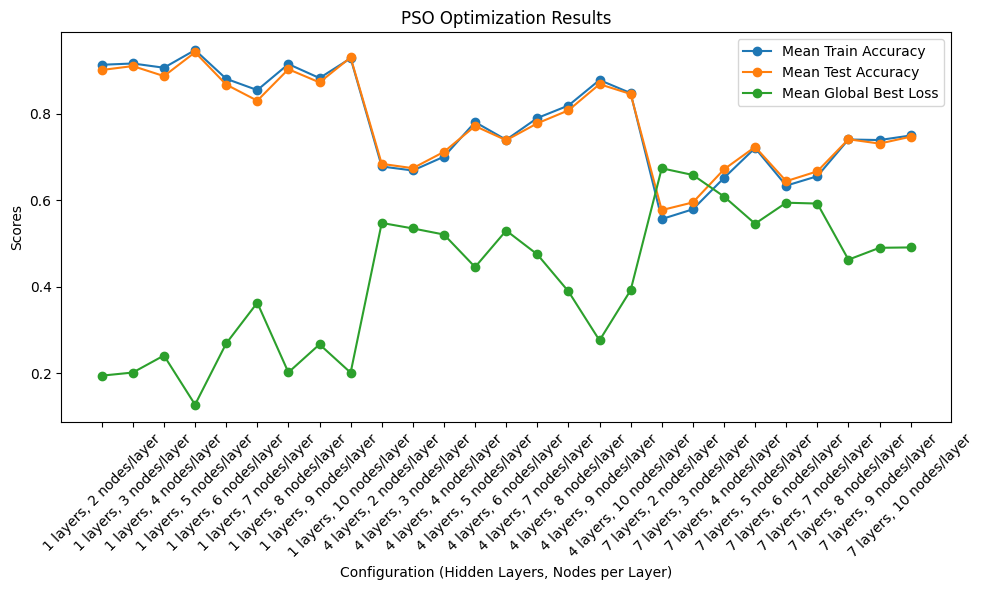

In [ ]:
results = {
    'configuration': [],
    'mean_train_accuracy': [],
    'mean_test_accuracy': [],
    'mean_global_best_loss': []
}


# Define the range for the number of hidden layers and nodes per layer
hidden_layers_range = range(1, 10, 3)  # 1 to 3 hidden layers
nodes_per_layer_range = range(2, 11)  # 2 to 10 nodes per layer

# Iterate over the range of hidden layers
for num_hidden_layers in hidden_layers_range:
    # Iterate over the range of nodes per layer
    for nodes_per_layer in nodes_per_layer_range:
        # Create a configuration for the current combination
        configuration = [input_nodes]
        for _ in range(num_hidden_layers):
            configuration.append([nodes_per_layer, relu_activation])
        configuration.append([1, sigmoid_activation])  # Output layer with sigmoid_activation

        # Run the PSO algorithm with the current configuration
        params = [configuration, x_norm, y, 20, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.5, 0.3, 0.2, 0.9), 4, BinaryCrossEntropy(), 100, [0,1], [0,1], [0,1]]
        mean_train_accuracy, mean_test_accuracy, mean_global_best_loss = calculate_mean_scores(params)

        # Record the results for analysis
        results['configuration'].append(f"{num_hidden_layers} layers, {nodes_per_layer} nodes/layer")
        results['mean_train_accuracy'].append(mean_train_accuracy)
        results['mean_test_accuracy'].append(mean_test_accuracy)
        results['mean_global_best_loss'].append(mean_global_best_loss)

# Plotting the results
plt.figure(figsize=(10, 6))

# Train Accuracy Plot
plt.plot(results['configuration'], results['mean_train_accuracy'], label='Mean Train Accuracy', marker='o')

# Test Accuracy Plot
plt.plot(results['configuration'], results['mean_test_accuracy'], label='Mean Test Accuracy', marker='o')

# Global Best Loss Plot
plt.plot(results['configuration'], results['mean_global_best_loss'], label='Mean Global Best Loss', marker='o')

plt.xlabel('Configuration (Hidden Layers, Nodes per Layer)')
plt.ylabel('Scores')
plt.title('PSO Optimization Results')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Testing our model on another Dataset

### Iris Dataset

In [ ]:
iris = pd.read_csv("/content/drive/MyDrive/F20BC-Dataset/Iris.csv")

In [ ]:
iris.shape

(150, 6)

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.drop(columns=['Id'], inplace=True)
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
irisX = iris.iloc[:, :-1].to_numpy()
irisY = iris.iloc[:, -1].to_numpy()

In [ ]:
irisXNorm = norm(irisX)

In [ ]:
irisXNorm.shape

(150, 4)

In [ ]:
irisConfig = [
    4,
    [3, relu_activation],
    [4, relu_activation],
    [1, sigmoid_activation]
]

In [ ]:
def label_encode(data):
    label_encoder = LabelEncoder()
    numerical_data = label_encoder.fit_transform(data)
    return numerical_data

# Example usage:
irisY = label_encode(irisY)
print(irisY)  # Output will be something like [0, 1, 2]


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
params = [irisConfig, irisXNorm, irisY, 20, (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.5, 0.3, 0.2, 0.9), 4, BinaryCrossEntropy(), 200, [0,1], [0,1], [0,1]]
irisANN = ann(params)

print("Train Score:", irisANN[0])
print("Test Score:", irisANN[1])

Train Score: 0.3416666666666667
Test Score: 0.3
